In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from data_processing import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from data_transformar import *
import lightgbm as lgb
from sklearn.decomposition import PCA
from matplotlib import rcParams

warnings.simplefilter("ignore")
%matplotlib inline
%load_ext autoreload
%autoreload 2

sns.set(style="darkgrid")

In [2]:
data = pd.read_csv("./train.csv")
data = data.drop(columns=["Id"])

In [3]:
data=data.drop(columns=['PoolQC', 'MiscFeature','Alley', 'Fence', 'FireplaceQu'], axis=1)

In [4]:
y = np.log1p(data["SalePrice"])
X = data.drop(columns=["SalePrice"])

print(X.shape)

(1460, 74)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=98987)

transformer = DataTransformer(True, StandardScaler())

In [6]:
n_cols = X_train.select_dtypes([np.number]).columns
o_cols = X_train.select_dtypes([object]).columns

In [7]:
transformer.imputer_fit(X_train[n_cols])

X_train[n_cols] = transformer.imputer_transform(X_train[n_cols])
X_test[n_cols] = transformer.imputer_transform(X_test[n_cols])

transformer.scaler_fit(X_train[n_cols])

X_train[n_cols] = transformer.scaler_transform(X_train[n_cols])
X_test[n_cols] = transformer.scaler_transform(X_test[n_cols])

In [8]:
#print(np.isnan(X_train[n_cols]).any())
#print(np.isnan(X_test[n_cols]).any())

In [9]:
transformer.fit_encoder(X_train)

X_train = transformer.encode(X_train)
X_test = transformer.encode(X_test)

(1168, 36) (1168, 242)
(292, 36) (292, 242)


In [10]:
X_train_new.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,232,233,234,235,236,237,238,239,240,241
0,-0.852690,-0.246209,-0.188899,-0.802676,-0.505372,0.743533,0.424308,-0.571617,0.120226,-0.293598,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.096617,1.128006,0.222697,2.805967,-0.505372,1.177739,1.104666,0.962072,1.819492,-0.293598,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.333944,-0.911152,-0.581133,1.362510,-0.505372,-3.331327,0.084129,-0.571617,-0.390636,-0.293598,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.852690,0.019768,-0.138270,-0.802676,2.202310,-0.225082,0.618696,0.364384,0.479561,-0.293598,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.333944,-0.467857,-0.097099,-0.802676,1.299749,-2.062108,0.813084,-0.571617,-0.951285,-0.293598,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [11]:
np.isnan(X_train[n_cols]).any()

MSSubClass       False
LotFrontage      False
LotArea          False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchenAbvGr     False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt      False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
dtype: bool

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

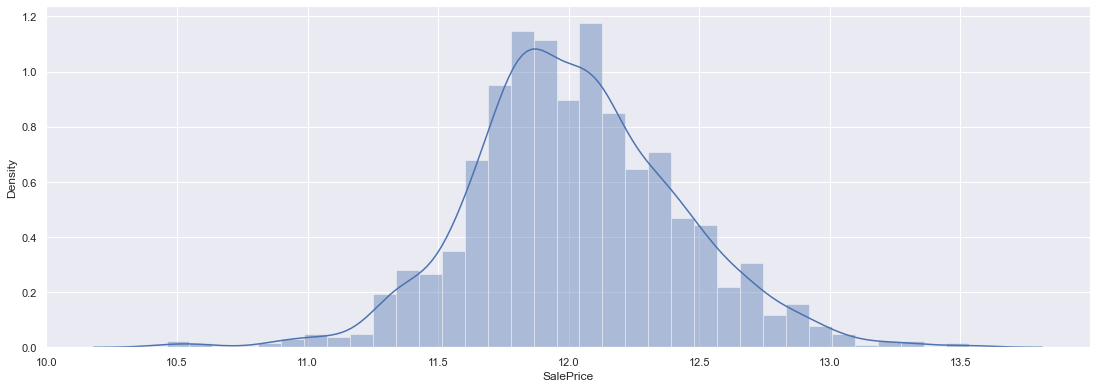

In [12]:
rcParams['figure.figsize'] = 18.7, 6.27

sns.distplot(y)

In [321]:
right_out_train_id = y_train[y_train.iloc[:] > 13]

In [322]:
middle_out_train_id = y_train[(y_train.iloc[:] < 12.5) & (y_train.iloc[:] > 11.5)]
middle_out_test_id = y_test[(y_test.iloc[:] < 12.5) & (y_test.iloc[:] > 11.5)]

In [323]:
X_train_mid = X_train.loc[middle_out_train_id.index.values]
y_train_mid = y_train.loc[middle_out_train_id.index.values]

X_test_mid = X_test.loc[middle_out_test_id.index.values]
y_test_mid = y_test.loc[middle_out_test_id.index.values]

In [324]:
X_train_mid.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1079,-0.852690,-0.246209,-0.188899,-0.802676,-0.505372,0.743533,0.424308,-0.571617,0.120226,-0.293598,...,-0.050746,-0.302636,-0.041416,0.383859,-0.261951,-0.058621,-0.083045,-0.121531,0.458653,-0.304319
1349,0.333944,-0.911152,-0.581133,1.362510,-0.505372,-3.331327,0.084129,-0.571617,-0.390636,-0.293598,...,-0.050746,-0.302636,-0.041416,0.383859,-0.261951,-0.058621,-0.083045,-0.121531,0.458653,-0.304319
1093,-0.852690,0.019768,-0.138270,-0.802676,2.202310,-0.225082,0.618696,0.364384,0.479561,-0.293598,...,-0.050746,-0.302636,-0.041416,0.383859,-0.261951,-0.058621,-0.083045,-0.121531,0.458653,-0.304319
740,0.333944,-0.467857,-0.097099,-0.802676,1.299749,-2.062108,0.813084,-0.571617,-0.951285,-0.293598,...,-0.050746,-0.302636,-0.041416,0.383859,3.817504,-0.058621,-0.083045,-0.121531,-2.180297,-0.304319
1019,1.520578,-1.221459,-0.830048,0.640781,-0.505372,1.110938,0.958875,0.245974,-0.916650,-0.293598,...,-0.050746,-0.302636,-0.041416,0.383859,-0.261951,-0.058621,-0.083045,-0.121531,0.458653,-0.304319


In [325]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1079,-0.852690,-0.246209,-0.188899,-0.802676,-0.505372,0.743533,0.424308,-0.571617,0.120226,-0.293598,...,-0.050746,-0.302636,-0.041416,0.383859,-0.261951,-0.058621,-0.083045,-0.121531,0.458653,-0.304319
389,0.096617,1.128006,0.222697,2.805967,-0.505372,1.177739,1.104666,0.962072,1.819492,-0.293598,...,-0.050746,3.304295,-0.041416,-2.605123,-0.261951,-0.058621,-0.083045,-0.121531,-2.180297,3.286028
1349,0.333944,-0.911152,-0.581133,1.362510,-0.505372,-3.331327,0.084129,-0.571617,-0.390636,-0.293598,...,-0.050746,-0.302636,-0.041416,0.383859,-0.261951,-0.058621,-0.083045,-0.121531,0.458653,-0.304319
1093,-0.852690,0.019768,-0.138270,-0.802676,2.202310,-0.225082,0.618696,0.364384,0.479561,-0.293598,...,-0.050746,-0.302636,-0.041416,0.383859,-0.261951,-0.058621,-0.083045,-0.121531,0.458653,-0.304319
740,0.333944,-0.467857,-0.097099,-0.802676,1.299749,-2.062108,0.813084,-0.571617,-0.951285,-0.293598,...,-0.050746,-0.302636,-0.041416,0.383859,3.817504,-0.058621,-0.083045,-0.121531,-2.180297,-0.304319


In [326]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def evaluate(clf, to_test_X, to_test_y):
    
    predictions = clf.predict(to_test_X)
    print("Mean Absolute log Error : " + str(rmsle(predictions, to_test_y)))

In [328]:
xgb_model = xgb.XGBRegressor(
                colsample_bytree=1.,
                eta=0.01,
                max_depth=12,
                min_child_weight=1.5,
                n_estimators=14400,                                                                  
                alpha=0.,
                reg_lambda=0.1,
                subsample=0.2)


xgb_model.fit(X_train_mid, y_train_mid, early_stopping_rounds=25, eval_set=[(X_test_mid, y_test_mid)], verbose=False)

evaluate(xgb_model, X_train_mid, y_train_mid)
evaluate(xgb_model, X_test_mid, y_test_mid)
evaluate(xgb_model, X_test, y_test)

Mean Absolute log Error : 0.04195211307229634
Mean Absolute log Error : 0.09802862541940668
Mean Absolute log Error : 0.18749046307500286


In [332]:
def train_on_range(low, high, X_train, y_train, X_test, y_test):
    middle_out_train_id = y_train[(y_train.iloc[:] < high) & (y_train.iloc[:] > low)]
    middle_out_test_id = y_test[(y_test.iloc[:] < high) & (y_test.iloc[:] > low)]

    X_train_mid = X_train.loc[middle_out_train_id.index.values]
    y_train_mid = y_train.loc[middle_out_train_id.index.values]

    X_test_mid = X_test.loc[middle_out_test_id.index.values]
    y_test_mid = y_test.loc[middle_out_test_id.index.values]

    xgb_model = xgb.XGBRegressor(
                colsample_bytree=1.,
                eta=0.01,
                max_depth=12,
                min_child_weight=1.5,
                n_estimators=14400,                                                                  
                alpha=0.,
                reg_lambda=0.1,
                subsample=0.2)


    xgb_model.fit(X_train_mid, y_train_mid, early_stopping_rounds=25, eval_set=[(X_test_mid, y_test_mid)], verbose=False)

    evaluate(xgb_model, X_train_mid, y_train_mid)
    evaluate(xgb_model, X_test_mid, y_test_mid)

    return xgb_model

In [336]:
model = train_on_range(11.5, 12.5, X_train, y_train, X_test, y_test)

evaluate(model, X_test, y_test)

Mean Absolute log Error : 0.04195211307229634
Mean Absolute log Error : 0.09802862541940668
Mean Absolute log Error : 0.18749046307500286


In [344]:
model = train_on_range(0, 11, X_train, y_train, X_test, y_test)

evaluate(model, X_test, y_test)

Mean Absolute log Error : 0.17759685932886063
Mean Absolute log Error : 0.2330991359788523
Mean Absolute log Error : 1.3992779539495392
